In [21]:
# Import libraries
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv(f"../data/SPX500_H1.csv", parse_dates=['Datetime'], index_col='Datetime')
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2015-01-01 22:00:00+00:00,2058.0,2058.0,2058.0,2058.0,2
2015-01-01 23:00:00+00:00,2062.2,2065.2,2062.0,2065.2,287
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113
...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530


In [23]:
# Calculate Awesome Oscillator
df['AO'] = ta.ao(df['High'], df['Low'])
df['AO_Green'] = df['AO'] > df['AO'].shift(1)
df.tail(10)

,Open,High,Low,Close,Volume,AO,AO_Green
Datetime,,,,,,,
2025-02-13 05:00:00+00:00,6070.8,6072.0,6068.0,6069.0,405,4.199412,True
2025-02-13 06:00:00+00:00,6069.2,6072.2,6067.2,6067.2,723,4.420588,True
2025-02-13 07:00:00+00:00,6067.2,6068.0,6058.8,6061.2,1296,4.243235,False
2025-02-13 08:00:00+00:00,6061.0,6061.6,6039.8,6042.2,3623,1.186765,False
2025-02-13 09:00:00+00:00,6042.6,6055.8,6037.2,6054.8,2320,-3.100294,False
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173,-5.598529,False
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848,-7.854412,False
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530,-9.292059,False
2025-02-13 13:00:00+00:00,6053.4,6070.6,6047.2,6068.2,4737,-7.125588,True


In [24]:
df['Above_Zero'] = (df['AO'] > 0) & (df['AO'].shift(1) > 0) & (df['AO'].shift(2) > 0) # histogram is above zero
df['Saucer'] = (df['AO_Green'] == True) & (df['AO_Green'].shift(1) == False) & (df['AO_Green'].shift(2) == False) # Current bar is green and previous 2 are red

df['Signal'] = (df['Above_Zero'] == True) & (df['Saucer'] == True)

df["2015-01-08 10:00:00+00:00":]

,Open,High,Low,Close,Volume,AO,AO_Green,Above_Zero,Saucer,Signal
Datetime,,,,,,,,,,
2015-01-08 10:00:00+00:00,2038.2,2039.4,2037.0,2039.0,256,16.874118,False,True,False,False
2015-01-08 11:00:00+00:00,2038.8,2044.4,2038.0,2042.8,570,16.115294,False,True,False,False
2015-01-08 12:00:00+00:00,2043.2,2046.4,2041.4,2041.8,515,16.065882,False,True,False,False
2015-01-08 13:00:00+00:00,2042.0,2043.6,2039.6,2040.8,705,15.704118,False,True,False,False
2015-01-08 14:00:00+00:00,2040.8,2050.0,2040.0,2050.0,2230,15.877059,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173,-5.598529,False,False,False,False
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848,-7.854412,False,False,False,False
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530,-9.292059,False,False,False,False


In [25]:
# Calculate PnL for next 1, 2, 3... candles after confirmation
days = [1, 2, 3, 4, 5, 10, 25, 50, 100]
for i in days:
    df[f'Ret_{i}'] = (df['Close'].shift(-i) / df['Open'].shift(-1)) - 1
df

,Open,High,Low,Close,Volume,AO,AO_Green,Above_Zero,Saucer,Signal,Ret_1,Ret_2,Ret_3,Ret_4,Ret_5,Ret_10,Ret_25,Ret_50,Ret_100
Datetime,,,,,,,,,,,,,,,,,,,
2015-01-01 22:00:00+00:00,2058.0,2058.0,2058.0,2058.0,2,NaN,False,False,False,False,0.001455,0.001261,0.002328,0.002813,0.002716,0.002231,-0.008535,-0.019203,-0.012026
2015-01-01 23:00:00+00:00,2062.2,2065.2,2062.0,2065.2,287,NaN,False,False,False,False,-0.000194,0.000872,0.001356,0.001259,0.002034,0.000387,-0.007747,-0.020337,-0.012590
2015-01-02 00:00:00+00:00,2065.2,2065.2,2063.6,2064.8,58,NaN,False,False,False,False,0.000969,0.001453,0.001356,0.002131,0.001646,0.000678,-0.008039,-0.021404,-0.012688
2015-01-02 01:00:00+00:00,2065.0,2067.6,2065.0,2067.0,283,NaN,False,False,False,False,0.000581,0.000484,0.001258,0.000774,0.001548,-0.001064,-0.006967,-0.022740,-0.013354
2015-01-02 02:00:00+00:00,2066.8,2068.6,2066.6,2068.0,113,NaN,False,False,False,False,-0.000193,0.000580,0.000097,0.000870,0.002224,-0.000484,-0.007253,-0.023015,-0.014215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-13 10:00:00+00:00,6054.8,6058.2,6051.2,6056.8,1173,-5.598529,False,False,False,False,-0.000297,-0.000462,0.001915,0.002262,NaN,NaN,NaN,NaN,NaN
2025-02-13 11:00:00+00:00,6056.6,6061.6,6048.8,6054.8,2848,-7.854412,False,False,False,False,-0.000198,0.002180,0.002527,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-13 12:00:00+00:00,6055.0,6056.8,6048.8,6053.8,2530,-9.292059,False,False,False,False,0.002445,0.002792,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Generate column names
ret_columns = [f'Ret_{day}' for day in days]

# Filter the DataFrame where 'Signal' is True
sys_results = df[df['Signal']][ret_columns]
remaining_rows = df[~df['Signal']][ret_columns]

# Calculate profits and losses separately for each column
sys_profits = sys_results[sys_results > 0].sum()
sys_losses = abs(sys_results[sys_results < 0].sum())
bench_profits = remaining_rows[remaining_rows > 0].sum()
bench_losses = abs(remaining_rows[remaining_rows < 0].sum())

# Calculate the profit factor directly
sys_pf = sys_profits / sys_losses
bench_pf = bench_profits / bench_losses

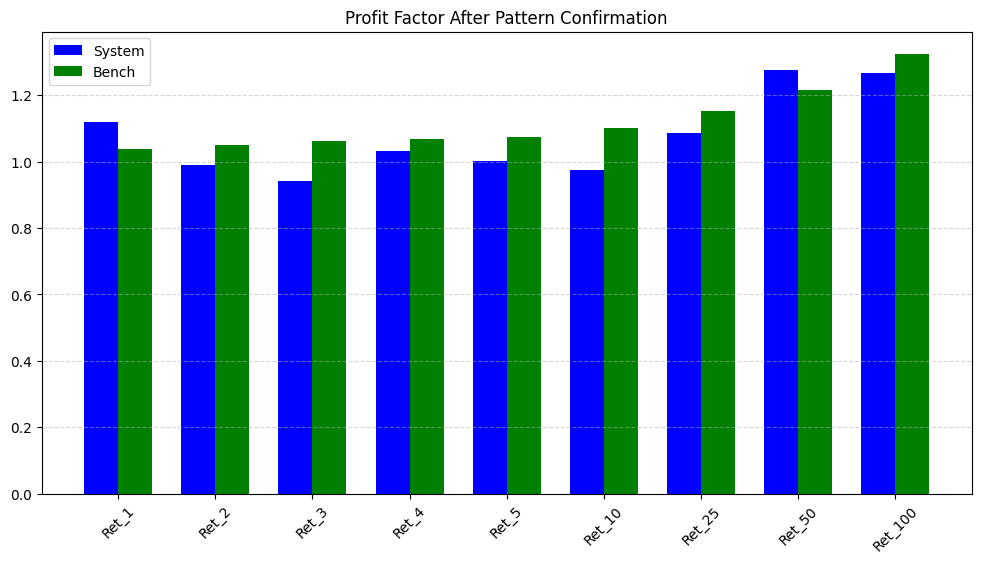

In [27]:
# Plot Profit Factor
plt.figure(figsize=(12, 6))
bar_width = 0.35

x_pos = np.arange(len(ret_columns))

# Plot system PnL
plt.bar(x_pos - bar_width/2, sys_pf, width=bar_width, color='blue', label='System')

# Plot random PnL
plt.bar(x_pos + bar_width/2, bench_pf, width=bar_width, color='green', label='Bench')

# Plot formatting
plt.title('Profit Factor After Pattern Confirmation')
plt.xticks(np.arange(len(ret_columns)), ret_columns, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()